In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the excel file into a pandas DataFrame

combined_data = pd.read_excel('2010-2019combineddata.xls')
combined_data.set_index('Current residence in', inplace=True)
combined_data.head()

,Population 1 year and over,Same house 1 year ago,Same state of residence 1 year ago,Total_Incoming,Total_Outgoing,Net Migration,Avg. Home Price,Median Income,Unemployment Rate,Alabama,...,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Puerto Rico,U.S. Island Area,Foreign Country
Current residence in,,,,,,,,,,,,,,,,,,,,,
Alabama,4729509,3987155,620465,108723,99850,8873,123268.6667,40933,10.5,0,...,1336,0,2490,1171,41,1155,27,228,181,12757
Alaska,702974,565031,95878,36326,94848,-58522,259908.9167,57848,7.9,477,...,1274,353,714,2421,0,158,81,19,1374,4346
Arizona,6332786,5069002,1001991,222725,177056,45669,157288.3333,46896,10.4,416,...,7164,664,3413,12645,595,5556,593,599,223,38246
Arkansas,2888304,2387806,412997,79127,64264,14863,107754.4167,38587,8.2,1405,...,361,0,494,264,0,821,443,87,0,8287
California,36907897,30790221,5413287,444749,575165,-130416,331464.0000,54283,12.2,3364,...,10653,525,14232,30544,1446,6031,1336,1223,5123,253294


In [3]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = combined_data["Avg. Home Price"].values.reshape(-1, 1)
y = combined_data["Net Migration"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (510, 1) (510, 1)


Text(0, 0.5, 'Net Migration')

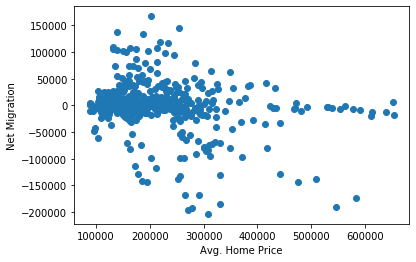

In [4]:
# Plot the data to see if a linear trend exists

plt.scatter(X, y)
plt.xlabel("Avg. Home Price")
plt.ylabel("Net Migration")

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
# Create the model

from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [7]:
# Fit the model to the training data. 
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[-0.09671103]]
y-axis intercept:  [19476.46792624]


In [9]:
# Note: we have to transform our min and max values 
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[88026.91667]]
Max X Value: [[653839.7273]]


In [10]:
# Calculate the y_min and y_max using model.predict and x_min and x_max

y_min = model.predict(x_min)
y_max = model.predict(x_max)

Text(0, 0.5, 'Net Migration')

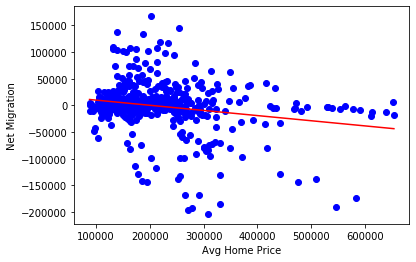

In [11]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]

plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
plt.xlabel("Avg Home Price")
plt.ylabel("Net Migration")

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 2065573080.8341613
R-squared (R2 ): 0.08796229869661698


In [14]:
model.score(X_test, y_test)

0.08796229869661698

Compariing MEDIAN AND NET MIGRATION

In [15]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = combined_data["Median Income"].values.reshape(-1, 1)
y = combined_data["Net Migration"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (510, 1) (510, 1)


Text(0, 0.5, 'Net Migration')

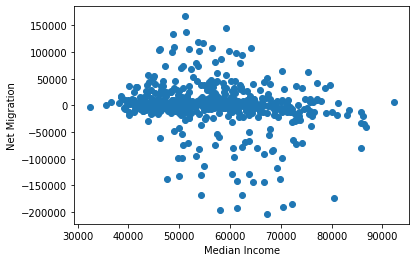

In [16]:
# Plot the data to see if a linear trend exists
plt.scatter(X, y)
plt.xlabel("Median Income")
plt.ylabel("Net Migration")

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create the model

from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fit the model to the training data. 
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)
# Note: we have to transform our min and max values 
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])

# Calculate the y_min and y_max using model.predict and x_min and x_max

y_min = model.predict(x_min)
y_max = model.predict(x_max)

Weight coefficients:  [[-0.86287247]]
y-axis intercept:  [47666.64135649]


Text(0, 0.5, 'Net Migration')

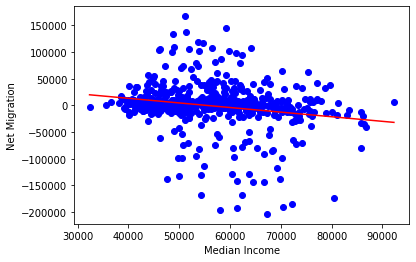

In [19]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]

plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
plt.xlabel("Median Income")
plt.ylabel("Net Migration")

In [20]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")
model.score(X_test, y_test)

Mean Squared Error (MSE): 2184997386.4903936
R-squared (R2 ): 0.03523142694916148


0.03523142694916148

UNEMPLOYMENT RATE AND NET MIGRATION

In [21]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = combined_data["Unemployment Rate"].values.reshape(-1, 1)
y = combined_data["Net Migration"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (510, 1) (510, 1)


Text(0, 0.5, 'Net Migration')

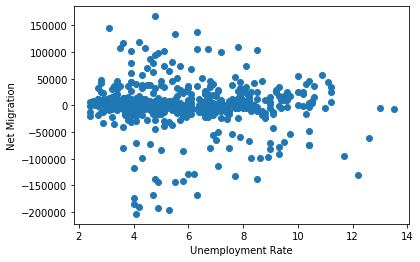

In [22]:
# Plot the data to see if a linear trend exists
plt.scatter(X, y)
plt.xlabel("Unemployment Rate")
plt.ylabel("Net Migration")

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create the model

from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fit the model to the training data. 
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)
# Note: we have to transform our min and max values 
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])

# Calculate the y_min and y_max using model.predict and x_min and x_max

y_min = model.predict(x_min)
y_max = model.predict(x_max)

Weight coefficients:  [[-1347.22796998]]
y-axis intercept:  [6627.6708824]


Text(0, 0.5, 'Net Migration')

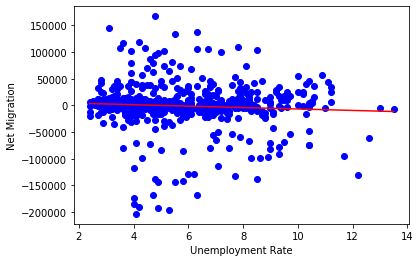

In [25]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]

plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
plt.xlabel("Unemployment Rate")
plt.ylabel("Net Migration")

In [26]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")
model.score(X_test, y_test)

Mean Squared Error (MSE): 2258683183.1981297
R-squared (R2 ): 0.0026960374867406323


0.0026960374867406323

UNEMPLOYMENT AND MEDIAN INCOME

In [27]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = combined_data["Unemployment Rate"].values.reshape(-1, 1)
y = combined_data["Median Income"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (510, 1) (510, 1)


Text(0, 0.5, 'Median Income')

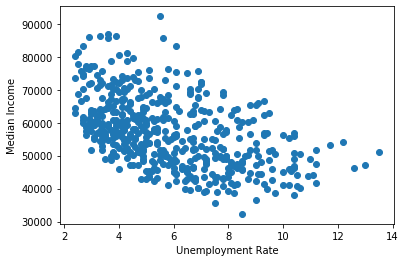

In [28]:
# Plot the data to see if a linear trend exists
plt.scatter(X, y)
plt.xlabel("Unemployment Rate")
plt.ylabel("Median Income")

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create the model

from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fit the model to the training data. 
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)
# Note: we have to transform our min and max values 
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])

# Calculate the y_min and y_max using model.predict and x_min and x_max

y_min = model.predict(x_min)
y_max = model.predict(x_max)

Weight coefficients:  [[-2414.24223801]]
y-axis intercept:  [70897.06379657]


Text(0, 0.5, 'Median Income')

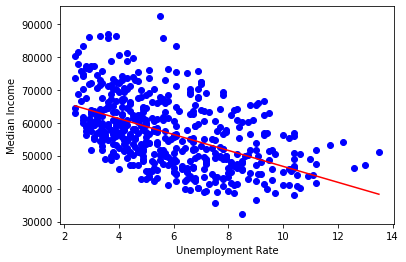

In [31]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]

plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
plt.xlabel("Unemployment Rate")
plt.ylabel("Median Income")

In [32]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")
model.score(X_test, y_test)

Mean Squared Error (MSE): 71972282.34716444
R-squared (R2 ): 0.2879601086440977


0.2879601086440977